###### Import Necessary Libraries

In [35]:
import os
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator

###### Import Necessary Libraries

In [36]:
# Define constants
image_size = (64, 64)
batch_size = 32
num_classes = 10
epochs = 10

# Define data paths
train_data_dir = 'dataset/training'
validation_data_dir = 'dataset/validation'

# Create an image data generator with data augmentation for training data
train_datagen = ImageDataGenerator(
    rescale=1./255,          # Rescale pixel values to [0, 1]
    rotation_range=20,      # Randomly rotate images by up to 20 degrees
    width_shift_range=0.2,  # Randomly shift images horizontally by up to 20%
    height_shift_range=0.2, # Randomly shift images vertically by up to 20%
    shear_range=0.2,        # Shear transformations
    zoom_range=0.2,         # Randomly zoom in on images
    horizontal_flip=True,   # Randomly flip images horizontally
    fill_mode='nearest'     # Fill in missing pixels with the nearest value
)

# Load and prepare the training data
train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical'
)

# Load and prepare the validation data
validation_datagen = ImageDataGenerator(rescale=1./255)  # Only rescale for validation
validation_generator = validation_datagen.flow_from_directory(
    validation_data_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical'
)

Found 2062 images belonging to 10 classes.
Found 2062 images belonging to 10 classes.


###### Build and Compile Model

In [37]:
# Build a convolutional neural network model
model = keras.Sequential([
    layers.Conv2D(32, (3, 3), input_shape=(image_size[0], image_size[1], 3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dense(num_classes, activation='softmax')
])

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

###### Train Model

In [40]:
# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // batch_size
)

Epoch 1/10
64/64 [==============================] - 12s 183ms/step - loss: 0.7006 - accuracy: 0.7704 - val_loss: 0.2753 - val_accuracy: 0.9033
Epoch 2/10
64/64 [==============================] - 11s 176ms/step - loss: 0.6454 - accuracy: 0.7709 - val_loss: 0.2978 - val_accuracy: 0.8999
Epoch 3/10
64/64 [==============================] - 11s 171ms/step - loss: 0.6243 - accuracy: 0.7936 - val_loss: 0.3078 - val_accuracy: 0.8994
Epoch 4/10
64/64 [==============================] - 11s 172ms/step - loss: 0.5664 - accuracy: 0.8034 - val_loss: 0.1911 - val_accuracy: 0.9434
Epoch 5/10
64/64 [==============================] - 11s 177ms/step - loss: 0.5248 - accuracy: 0.8167 - val_loss: 0.1995 - val_accuracy: 0.9385
Epoch 6/10
64/64 [==============================] - 11s 175ms/step - loss: 0.5662 - accuracy: 0.7980 - val_loss: 0.3945 - val_accuracy: 0.8516
Epoch 7/10
64/64 [==============================] - 11s 174ms/step - loss: 0.4997 - accuracy: 0.8291 - val_loss: 0.1709 - val_accuracy: 0.9521

######  Evaluate Model

In [41]:
# Evaluate the model on test data
test_loss, test_accuracy = model.evaluate(validation_generator, steps=validation_generator.samples // batch_size)
print(f'Test accuracy: {test_accuracy * 100:.2f}%')

64/64 [==============================] - 3s 53ms/step - loss: 0.2003 - accuracy: 0.9341
Test accuracy: 93.41%


###### Make Predictions

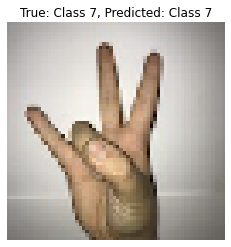

In [47]:
import matplotlib.pyplot as plt
# Make predictions on the validation dataset
predictions = model.predict(validation_generator)

# You can map integer labels to class names if you have a mapping
class_names = ['Class 0', 'Class 1', 'Class 2', 'Class 3', 'Class 4', 'Class 5', 'Class 6', 'Class 7', 'Class 8', 'Class 9']  # Replace with your class labels

# Number of images you want to visualize (adjust as needed)
num_images_to_visualize = 1

# Visualize a random selection of images
for i in range(num_images_to_visualize):
    index = np.random.randint(0, len(validation_generator))
    images, labels = validation_generator[index]
    
    # Visualize the first image in the batch
    image = images[0]
    predicted_class = np.argmax(predictions[index])
    true_class = np.argmax(labels[0])
    
    # Display the image
    plt.imshow(image)
    plt.title(f"True: {class_names[true_class]}, Predicted: {class_names[predicted_class]}")
    plt.axis('off')
    plt.show()